PROJCS["ETRS_1989_UTM_Zone_32N_8stellen",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",32500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102329"]]


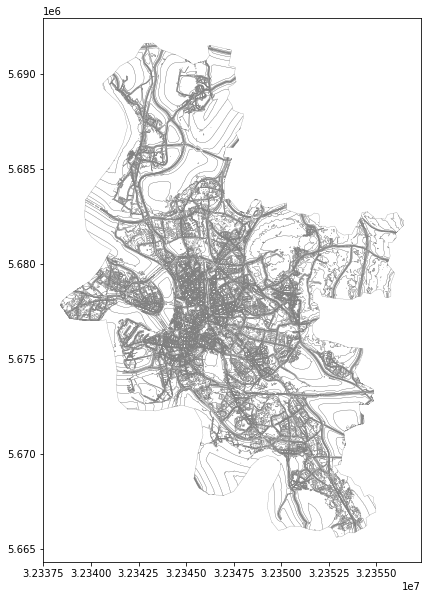

In [20]:
#importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

dus = gpd.read_file("Straßenlärmkarte_Düsseldorf_2018/StrLK_2018_tagsüber.shp")

ax = dus.plot(figsize=(10,10), color='None', edgecolor='grey', linewidth=0.25)


print(dus.crs)

In [34]:
from ee_plugin import Map

ModuleNotFoundError: No module named 'ee_plugin'

In [33]:
#importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

dus = gpd.read_file("Stadtteile/Düsseldorf_Stadtteile.shp")
canvas = iface.mapCanvas() 
canvas.mapRenderer().setProjectionsEnabled(True) 
canvas.mapRenderer().setDestinationCrs(QgsCoordinateReferenceSystem("EPSG:2154"))

ax = dus.plot(figsize=(10,10), color='#CCCCCC', edgecolor='white', linewidth=0.5)

print(dus.crs)

NameError: name 'iface' is not defined

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import folium
import contextily as cx
import shapely
from shapely.geometry import Point
from pathlib import Path
import pyproj
%matplotlib inline

In [25]:
dataset = pd.read_csv('noise_dus.csv')

In [26]:
df = dataset.sample(25)

##### Syntax:

##### DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)

Parameters:

n: int value, Number of random rows to generate.

frac: Float value, Returns (float value * length of data frame values ).
frac cannot be used with n.

replace: Boolean value, return sample with replacement if True.

random_state: int value or numpy.random.RandomState, optional. if set to a particular integer, will return same rows as sample in every iteration.

axis: 0 or ‘row’ for Rows and 1 or ‘column’ for Columns.

In [27]:
df.set_index('Index', inplace=True)

DataFrames and Series always have an index. Although it displays alongside the column(s), it is not a column, which is why del df['index'] did not work.

If you want to replace the index with simple sequential numbers, use df.reset_index().

You can set one of the columns as an index in case it is an "id" for example. In this case the index column will be replaced by one of the columns you have chosen.

df.set_index('id', inplace=True)

In [28]:
df['Bezirk']=df['Bezirk'].astype(str)
df['DB_TAG']=df['DB_TAG'].astype(float)
df['DB_NACHT']=df['DB_NACHT'].astype(float)
df.replace(' ', np.nan,inplace=True)
df['Latitude']=df['Latitude'].astype(float)
df['Longitude']=df['Longitude'].astype(float)

In [29]:
from shapely.geometry import Point, Polygon
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [30]:
noise=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Latitude,df.Longitude,crs="EPSG:4326"))
noise

,Bezirk,DB_TAG,DB_NACHT,Latitude,Longitude,geometry
Index,,,,,,
76340,"Wiesdorfer StraÃŸe 50, DÃ¼sseldorf, Germany",57.0,49.0,51.188275,6.816452,POINT (51.18828 6.81645)
30893,"HabichtstraÃŸe 39, DÃ¼sseldorf, Germany",54.0,46.0,51.259140,6.804260,POINT (51.25914 6.80426)
238,"AbteihofstraÃŸe 5a, DÃ¼sseldorf, Germany",57.0,49.0,51.186597,6.763025,POINT (51.18660 6.76302)
19093,"DianastraÃŸe 16, DÃ¼sseldorf, Germany",60.0,52.0,51.208307,6.762406,POINT (51.20831 6.76241)
61354,"Ratinger Weg 11, DÃ¼sseldorf, Germany",57.0,48.0,51.246243,6.854139,POINT (51.24624 6.85414)
31852,"Hans-Sachs-StraÃŸe 60, DÃ¼sseldorf, Germany",56.0,47.0,51.239199,6.811277,POINT (51.23920 6.81128)
5161,"Am Pflanzkamp 30, DÃ¼sseldorf, Germany",61.0,55.0,51.192235,6.861693,POINT (51.19224 6.86169)
49655,"LÃ¶ricker StraÃŸe 63, DÃ¼sseldorf, Germany",62.0,53.0,51.247655,6.722836,POINT (51.24765 6.72284)
32050,"HardtstraÃŸe 43, DÃ¼sseldorf, Germany",57.0,48.0,51.239588,6.830480,POINT (51.23959 6.83048)


<AxesSubplot:>

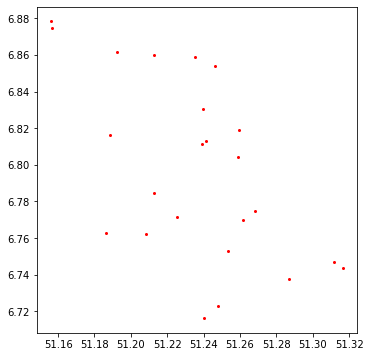

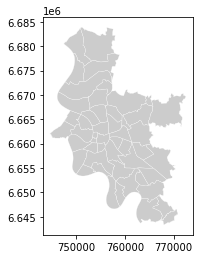

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))
dus.plot(color='#CCCCCC', edgecolor='white', linewidth=0.25)
noise.plot(ax=ax, markersize=4, color="red", marker="o")